#Installation

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.0.2-py3-none-any.whl size=2444 sha256=7735d19e35e12424878dfd93900240452fd2e6ac538832b110f5340d619cc250
  Stored in directory: /root/.cache/pip/wheels/0e/70/a7/7775b575dc496051c7875f9e5f705515602e2356a9131e8a6e
Successfully built colabgymrender


In [ ]:
#For Box2D environnement
!pip install swig
!pip install box2d-py
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp39-cp39-linux_x86_64.whl size=2807764 sha256=086ec43e9137af59af79be92b48df30f573d167545e27e1f6de5d890af1bef84
  Stored in directory: /root/.cache/pip/wheels/a0/6a/54/2383a12859109612796c6b235ff6704a82b99caa4308ca0b43
Successfully built box2d-py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [ ]:
#For mujocco like environnement
!pip install pybullet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 MB 9.9 MB/s eta 0:00:00


In [ ]:
!pip3 install imageio==2.4.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=251016b70d165f2786b8ce9c9c6a6edaffead1b7879beedc3540e48d67150d97
  Stored in directory: /root/.cache/pip/wheels/b7/44/b7/2e7cc9c5fe4a893b9cc83a010d4410557bedf6cf3b5829f497
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


# Policies definition
Define all policy as a lambda function in dictionnaries

In [ ]:
import gym
import pybullet_envs
import numpy as np
from colabgymrender.recorder import Recorder
import warnings
warnings.filterwarnings(action='ignore')#, category=FutureWarning) # setting ignore as a parameter and further adding category


def if_then_else(cond, true, false):
    return true if cond else false

GP_policy = {
    "CartPole-v1": lambda s: int(s[3]> -8.44*s[2]),
    "Acrobot-v1": lambda s: np.argmax([s[4], s[4], s[5]]),
    "MountainCarContinuous-v0": lambda s:[if_then_else(abs(s[1])> 0.001, 4.861434963392261, 120.22370232914776)*s[1]],# Version that exploit proteced opérator ( in particular div(s[1],s[1]) used like a bit like Dirac delta function)
    #"MountainCarContinuous-v0": lambda s: [(-36.1658411106967*s[1] + 11.14148115974943)*s[1]],# Version that don't use protected operator as non linearity.
    "Pendulum-v0": lambda s: [s[0] - (9.16*s[2] + 40.14*s[1])/s[0]],
    "InvertedDoublePendulumBulletEnv-v0": lambda s: [-10.7*s[7]],
    "InvertedPendulumSwingupBulletEnv-v0": lambda s: [s[4] + s[3]*6.614633680991087 - s[2] + np.exp(if_then_else(s[3]>-0.7571072906634332, s[1], 15.013603569678889*s[1]))],
    "LunarLanderContinuous-v2": lambda s: [-(2*s[3]+s[1]) - 0.20, -19.77*(s[2]-s[5]*(s[1]+1))],
    "BipedalWalker-v3": lambda s: [s[6], s[7]/s[19], s[22]/s[7] - s[9] + s[0], s[0] - s[11]],
    "HopperBulletEnv-v0": lambda s: [(s[9]+s[7])/(-25.552410848838754*s[5]-11.694385276665386),  s[2] - s[10] + (np.sin(s[13]) - s[12])*s[14] - np.log(s[2])-s[11], -3.173856320619809*s[12]]
}

LinGP_policy = {
    "CartPole-v1": lambda s: int(s[3]> -s[2]-s[1]),
    "Acrobot-v1": lambda s: np.argmax([0,  if_then_else(5.79>s[5], s[5], -s[5]), if_then_else(s[4]<s[5], s[5] + 5.79, 0.0)]),
    "MountainCarContinuous-v0": lambda s: [32.6*s[1]],
    "Pendulum-v0": lambda s: [0.14 - 4.05*s[0]*(4.05*s[1] + s[2])],
    "InvertedDoublePendulumBulletEnv-v0": lambda s: [-11.4*s[7]],
    "InvertedPendulumSwingupBulletEnv-v0": lambda s: [4.80317773*(9.4457828593*s[3] + 2*s[4] + s[1])],
    "LunarLanderContinuous-v2": lambda s: [if_then_else(s[1]>0, -0.5*s[1]-s[3]+0.11, 0), 4*(4*(s[4]-s[0])-s[2])],
    "BipedalWalker-v3": lambda s: [if_then_else(s[3]<s[0], s[15]*s[21], 0.0), if_then_else(s[2]>s[11], np.sin(s[9])/-19.89, s[12]*s[6]), s[17]*s[6], if_then_else(s[18]<s[7], 1.0,if_then_else(0<s[17]*s[6], s[12]/s[16], 0))],
    "HopperBulletEnv-v0": lambda s: [if_then_else(s[13]>0, 0.6146104060912387, 0), s[2]-s[10]-s[11], if_then_else(s[0]-s[3]< s[12], s[0]-s[6]-s[3]-s[7], -3.78765294*s[3]-s[7])]
}

NMCS_policy = {
    "CartPole-v1": lambda s: int(8.0/(s[3]+s[2])> s[2]),
    "Acrobot-v1": lambda s: np.argmax([1, 0, 9.0/s[5]]),
    "MountainCarContinuous-v0": lambda s: [24*s[1]],
    "Pendulum-v0": lambda s: [s[1] - 9.0*s[0]/(s[1]+s[2])],
}


QD_GP_policy = {
    #"BipedalWalker-v3":  lambda s : [s[17]*s[18], s[15] - s[6], (s[17]/-4.829122484272009) - s[9], (-0.9309851003020525/(-29.687535240681534*s[1])) - s[11]],
    "BipedalWalker-v3":  lambda s : [if_then_else((s[23]/ s[19])> s[13], (s[20]* s[4])* s[11], 6.117137950422925),\
                                     ((s[21]* s[3])- (s[3]- s[0]))- ((((s[7]* s[15])- np.log(np.exp(s[9])))+ np.log(4.818319624124855))*  ((s[3]* s[16] )* (14.658769833461879/np.exp((-5.91564446994009/ 8.586164152740661))))),\
                                     ((np.exp(if_then_else(4.089616762232065> s[7], -18.528711261944476, 15.71414891993858))/ s[8]+ s[12]+ np.exp(-4.650511583955442)/ np.sin(s[9]- (s[8]- (-7.174866006050719)))* -20.478181410611906+ s[20])- s[1]),\
                                     s[0]/ -4.632822304172045],
    #"HopperBulletEnv-v0": lambda s: [np.sin(np.exp(s[8])), -6.257060739725605*(s[7] + np.sin(s[3]+s[7])), np.sin(np.sin(s[7])-np.sin(s[8])-s[10]*(s[1]-np.log(abs(s[8]*s[3])+0.0001) - 5.860219777510614))]
}

QD_LinGP_policy = {
    "BipedalWalker-v3": lambda s: [if_then_else(s[7]>-0.62, s[4]/-0.62, if_then_else(s[18]<s[5], s[2]*s[20], 0)), s[20]/(s[1]+0.001), s[18]-s[11], 0.3-s[11]],
    "HopperBulletEnv-v0": lambda s: [0.3568142180554972, if_then_else(s[11]>0, if_then_else(s[0]<0, - np.sin(s[7]), 0.0),  s[12] - s[10]) - s[11], if_then_else(s[0]>s[7], 0.3492908874652392, -4.118712031661802*s[3])]
}



/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
  from scipy.ndimage.filters import sobel



### Policies description


__Tree GP and LinearGP policies :__  
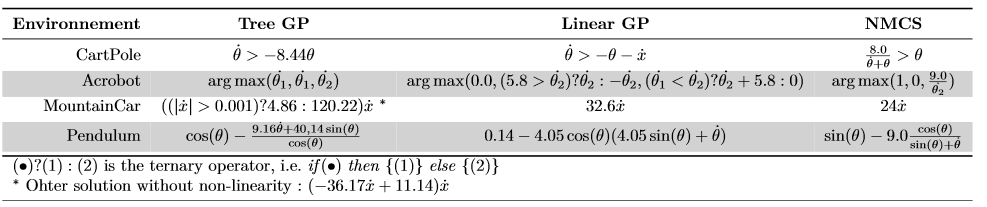

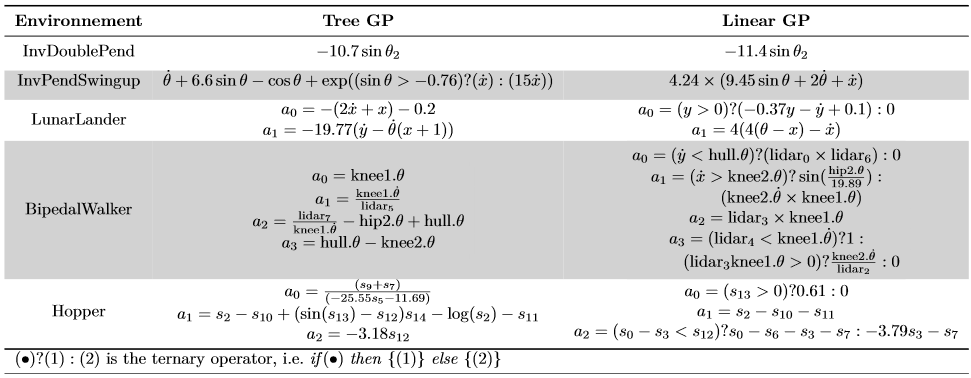

__QD Policies :__
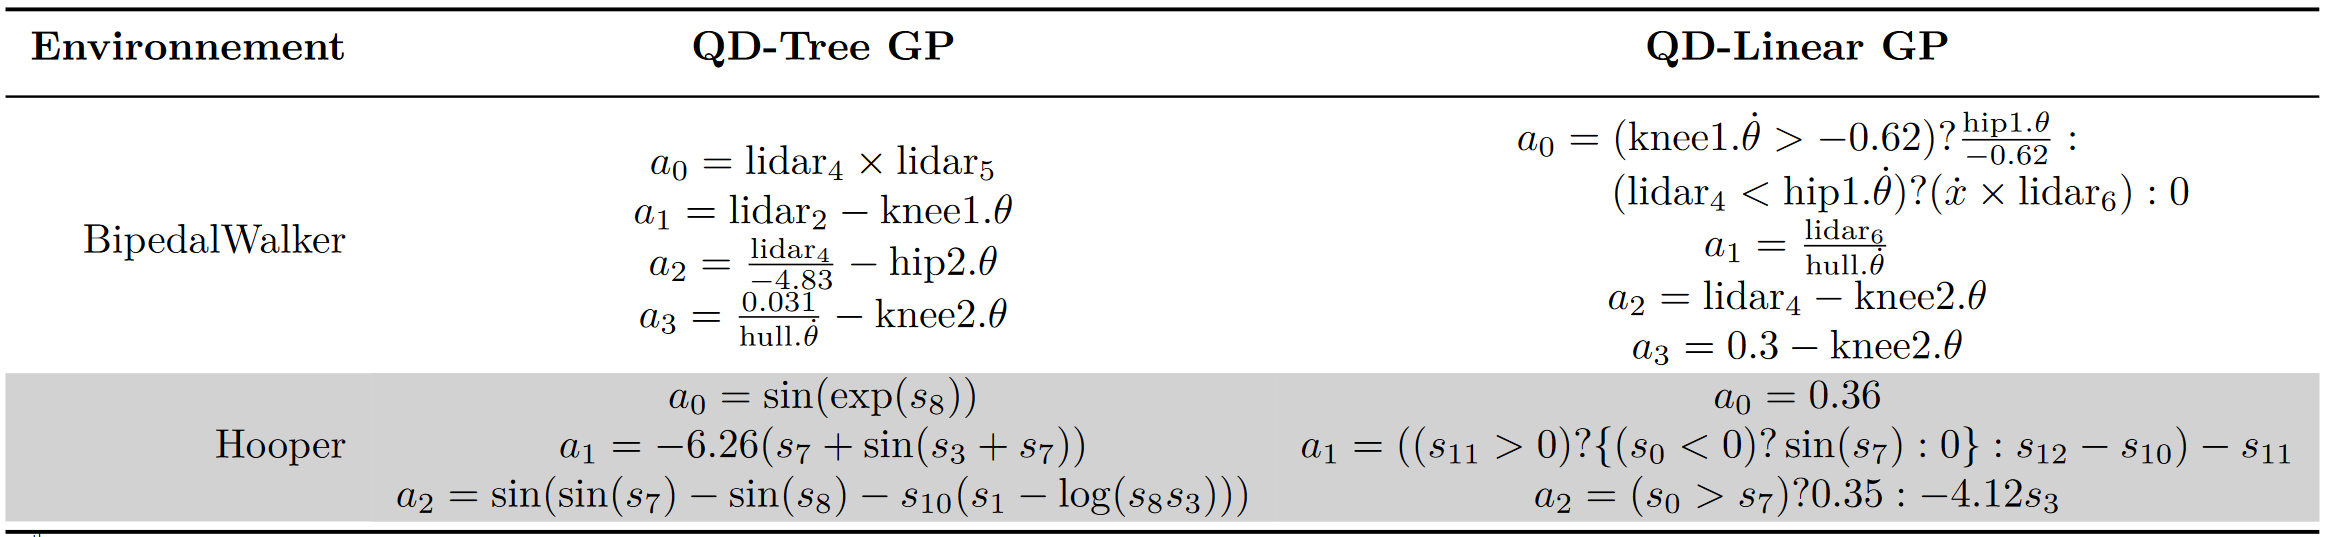

## Simulate a policy on the environment

In [ ]:
#name = "BipedalWalker-v3"#Environment to test
def testEnv(envName,agent):

    env = gym.make(envName)
    #env.seed()
    
    directory = './video'
    env = Recorder(env, directory)
    
    #agent = policy[name]#QD_GP_policy[name]#Take the policy from a specific approach
    
    obs = env.reset()
    
    r = 0
    for i in range(2000):
      action = agent(obs)
      obs, reward, done, info = env.step(action)
      r+=reward
    
      if done:
        break
      
    env.close()
    
    print("Done : ", done, "cumulative reward : ", r, "Number of steps : ", i+1)
    return policy

In [ ]:
#env.play()
policy = QD_GP_policy
for envName in policy.keys():
    agent = policy[envName]
    testEnv(envName,agent)
    

Done :  True cumulative reward :  -124.2242603718609 Number of steps :  82


In [ ]:
import os
import numpy as np
import random
from zipfile import ZipFile
import ntpath
import glob
import copy

from skimage.io import imread,imshow,imsave
from skimage import data
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.morphology import disk
from skimage.filters.rank import gradient
from skimage import filters
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage import exposure

import pandas as pd

import torch
from torch.utils.data import random_split
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
import torchvision
import torchvision.transforms as T
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torchvision.utils import make_grid

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'


In [ ]:
import pandas as pd
#spc_500 = pd.read_csv('log_sqdgp_Pendulum_500.csv', encoding='utf-8')
#spc_100 = pd.read_csv('log_sqdgp_Pendulum.csv', encoding='utf-8')
spc= pd.read_csv('log_sqdgp_Pendulum.csv', encoding='utf-8')
npc = pd.read_csv('log_nqdgp_Pendulum.csv', encoding='utf-8')

smc = pd.read_csv('log_sqdgp_MountainCarContinuous.csv', encoding='utf-8')
nmc = pd.read_csv('log_nqdgp_MountainCarContinuous.csv', encoding='utf-8')

slc = pd.read_csv('log_sqdgp_LunarLanderContinuous.csv', encoding='utf-8')
nlc = pd.read_csv('log_nqdgp_LunarLanderContinuous.csv', encoding='utf-8')

shc = pd.read_csv('log_sqdgp_HopperBulletEnv.csv', encoding='utf-8')
nhc = pd.read_csv('log_nqdgp_HopperBulletEnv.csv', encoding='utf-8')

sbc = pd.read_csv('log_sqdgp_BipedalWalker.csv', encoding='utf-8')
nbc = pd.read_csv('log_nqdgp_BipedalWalker.csv', encoding='utf-8')

sic = pd.read_csv('log_sqdgp_InvertedDoublePendulumBulletEnv.csv', encoding='utf-8')
nic = pd.read_csv('log_nqdgp_InvertedDoublePendulumBulletEnv.csv', encoding='utf-8')



In [ ]:
app1 = [npc,nmc,nhc,nic,nbc,nlc]
app2 = [spc,smc,shc,sic,sbc,slc]
all_enames = ["Pendulum","MountainCarContinuous","HopperBulletEnv","InvertedDoublePendulumBulletEnv","BipedalWalker","LunarLanderContinuous"]


In [ ]:

def get_all_gen(app):
    return [env.shape[0]-1 for env in app]
    
app1_gens = get_all_gen(app1)
app2_gens = get_all_gen(app2)        

In [ ]:
#Comparison Graph
def dftocompareApps(app1,app2,param):
    i=0
    tab = []
    for env1,env2 in zip(app1,app2):
      idx = app1_gens[i] if (app1_gens[i] < app2_gens[i]) else app2_gens[i]

      name = all_enames[i]
      row = [name,env1[param][idx],
                  env2[param][idx]]
      tab.append(row)
      i+=1
    return pd.DataFrame(columns=["Environment", "Fixed Feature Domain ","Flexi Feature Domain"],data=tab)
    
maxfitness_df= dftocompareApps(app1,app2,"fitness_max")
maxcomplexity_df= dftocompareApps(app1,app2,"complexity_max")


In [ ]:
maxfitness_df

,Environment,Fixed Feature Domain,Flexi Feature Domain
0,Pendulum,-0.791280,-0.689022
1,MountainCarContinuous,99.245603,99.145095
2,HopperBulletEnv,996.298076,788.819028
3,InvertedDoublePendulumBulletEnv,9359.418790,9359.211470
4,BipedalWalker,257.946896,278.101278
5,LunarLanderContinuous,305.020775,290.194061


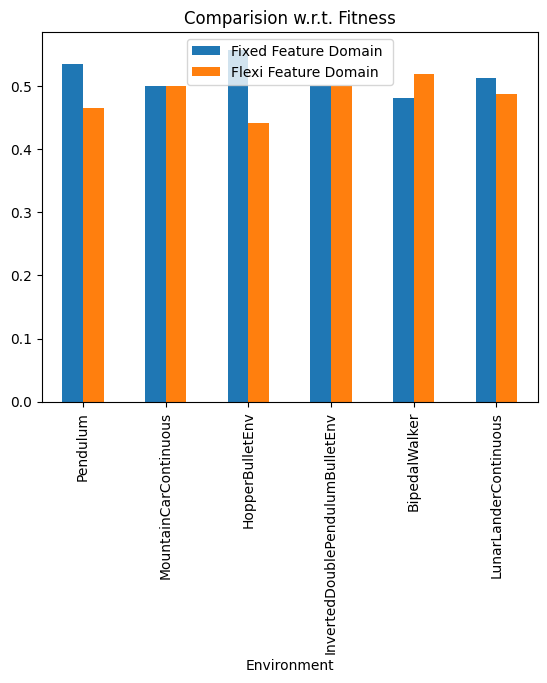

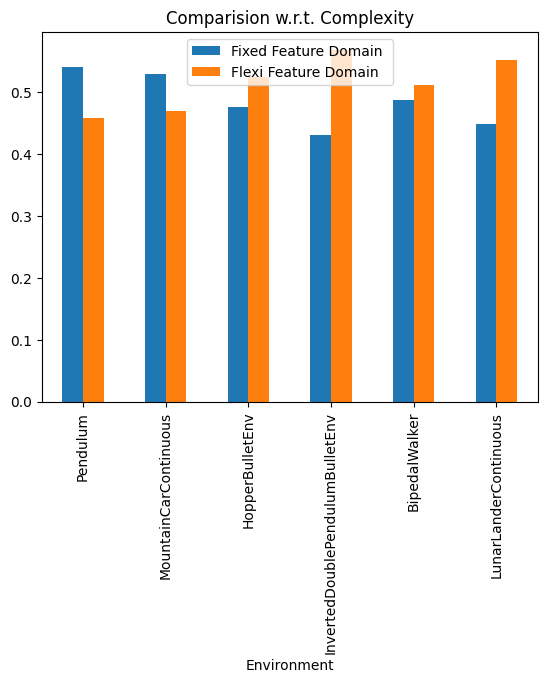

In [ ]:
#Comparison Graph
def plotdftocompareApps(app1,app2,param,title):
    i=0
    tab = []
    for env1,env2 in zip(app1,app2):
      idx = app1_gens[i] if (app1_gens[i] < app2_gens[i]) else app2_gens[i]

      name = all_enames[i]
      row = [name,env1[param][idx]/(env1[param][idx]+env2[param][idx]),
                  env2[param][idx]/(env1[param][idx]+env2[param][idx])]
      tab.append(row)
      i+=1
    df= pd.DataFrame(columns=["Environment",  "Fixed Feature Domain ","Flexi Feature Domain"],data=tab)
    df.plot(kind='bar' , x='Environment',title='Comparision w.r.t. '+ title);
#maxfitness_df= getdftocompareApps(app1,app2,"fitness_max")
#maxcomplexity_df= getdftocompareApps(app1,app2,"complexity_max")
plotdftocompareApps(app1,app2,"fitness_max","Fitness")
plotdftocompareApps(app1,app2,"complexity_max","Complexity")

In [ ]:
def plotConvergence(app1,app2,param,param_lable):
    i=0
    j=0
    k=0
    tab = []
    fig, axs = plt.subplots(3, 2,figsize=(10, 10))
    for env1,env2 in zip(app1,app2):
      name = all_enames[k]
      idx = app1_gens[k] if (app1_gens[k] < app2_gens[k]) else app2_gens[k]
      axs[i, j].plot(env1["iteration"][0:idx], env1[param][0:idx],label="Fixed Feature Domain")
      axs[i, j].plot(env1["iteration"][0:idx], env2[param][0:idx],label="Flexi Feature Domain")
      axs[i, j].set_title(name)
      axs[i, j].set_xlabel("Generations")
      axs[i, j].set_ylabel(param_lable)
      axs[i, j].legend()
      
      i+=1

      if i==3:
        i=0
        j+=1 
        if j==2: 
           j=0

      k+=1
      
    plt.tight_layout()
    #return pd.DataFrame(columns=["Environment", "XGPRL with Fixed Feature Domain ","XGPRL with Flexible Feature Domain"],data=tab)
    plt.title("Convergence of "+param+ " value")




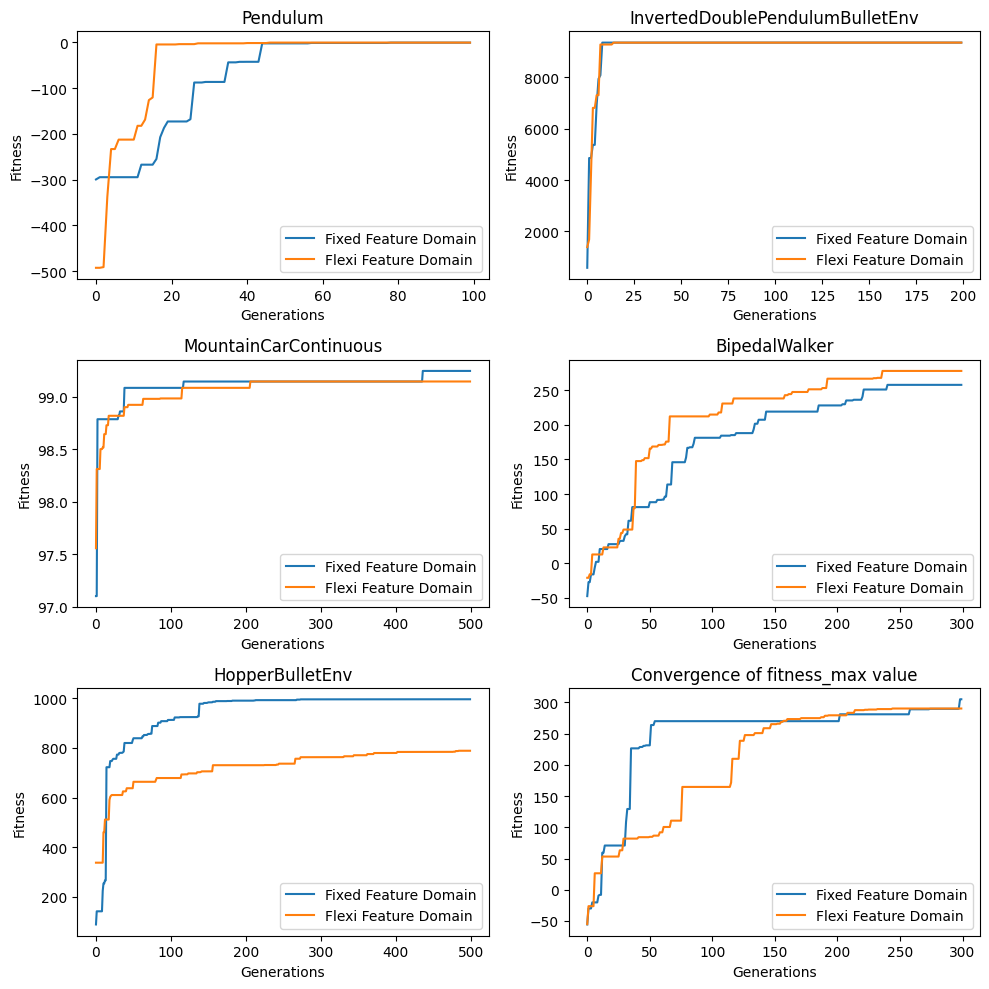

In [ ]:
plotConvergence(app1,app2,"fitness_max","Fitness")

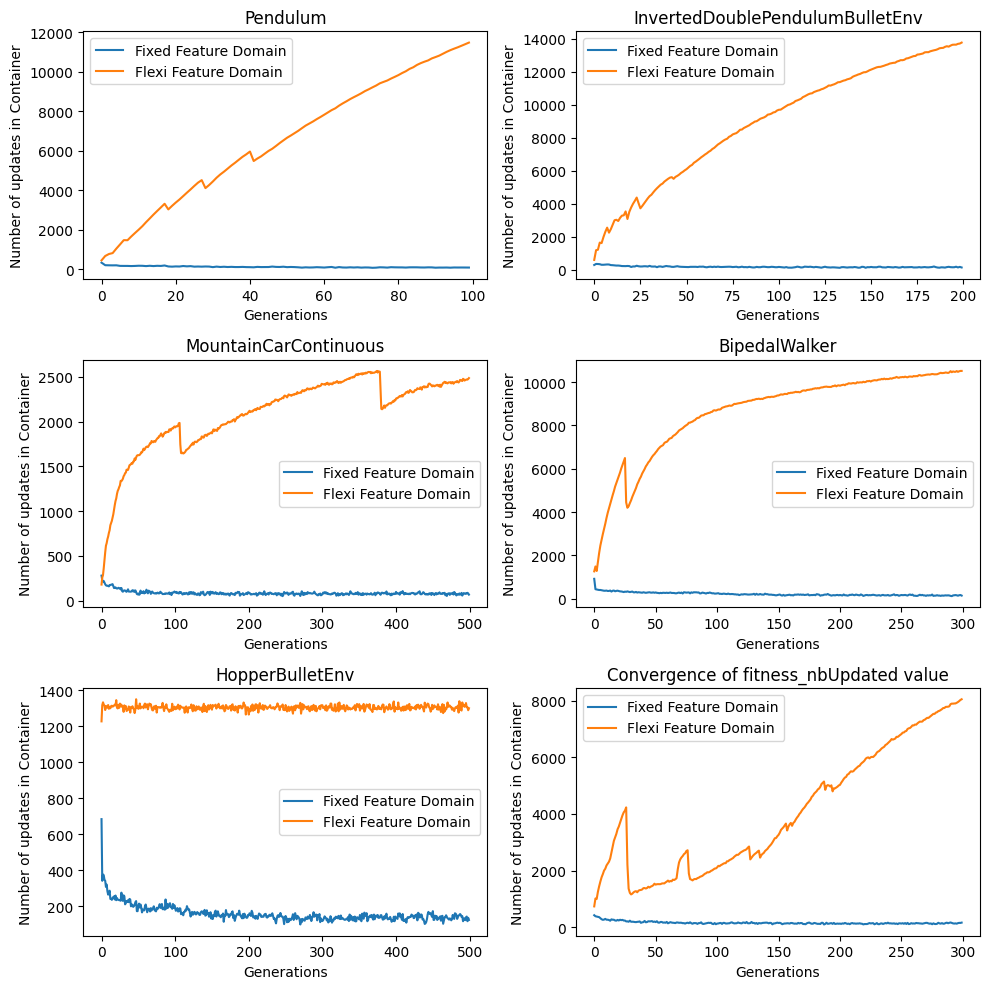

In [ ]:
plotConvergence(app1,app2,"fitness_nbUpdated","Number of updates in Container")

In [ ]:
spc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fitness_avg               101 non-null    float64
 1   fitness_std               101 non-null    float64
 2   fitness_min               101 non-null    float64
 3   fitness_max               101 non-null    float64
 4   fitness_iteration         101 non-null    int64  
 5   fitness_containerSize     101 non-null    object 
 6   fitness_evals             101 non-null    int64  
 7   fitness_nbUpdated         101 non-null    int64  
 8   fitness_elapsed           101 non-null    float64
 9   size_avg                  101 non-null    float64
 10  size_std                  101 non-null    float64
 11  size_min                  101 non-null    int64  
 12  size_max                  101 non-null    int64  
 13  size_iteration            101 non-null    int64  
 14  size_conta

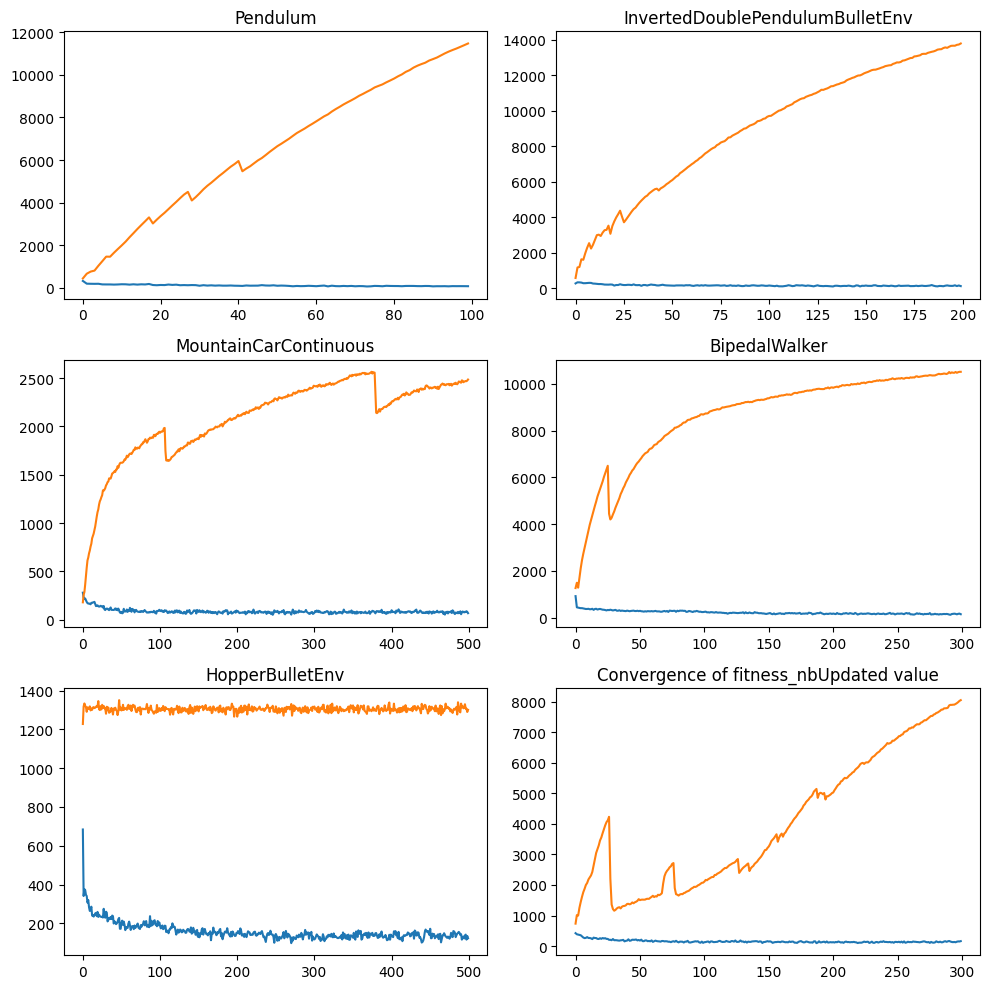

In [ ]:
plotConvergence(app1,app2,"fitness_nbUpdated")